# TEXT BASED ANALYSIS 

### Nandi Geetha  Krishnama Naidu 
### SHU ID : 0916341

# Topic Modeling

### British_Airway_Review

## import libraries and load dataset

In [1]:

# Loading data set using pandas.
import pandas as pd

file= "C:/Users/geeth/OneDrive/Desktop/text based analysis/British_Airway_Review.csv"
df = pd.read_csv(file)
df.head(10)

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure
5,✅ Trip Verified | An airline that lives in the...,26th July 2023,Qatar,Business Class,no,3,BKK to LHR,Business
6,✅ Trip Verified | Check-in Desk rude and dism...,26th July 2023,United Kingdom,Economy Class,no,3,London to Tampa,Couple Leisure
7,✅ Trip Verified | I chose British Airways espe...,25th July 2023,Spain,Economy Class,no,1,London to Sydney,Couple Leisure
8,Not Verified | I booked Premium Economy from I...,24th July 2023,United Kingdom,Premium Economy,no,9,LHR to CPT,Couple Leisure
9,✅ Trip Verified | A simple story with an unfor...,21st July 2023,Germany,Economy Class,no,7,BLR to LHR,Business


## couple of texts

In [9]:
# Define the indices for which you want to extract reviews
index_1 = 100  # Replace 100 with your first desired index
index_2 = 200  # Replace 200 with your second desired index

# Extract and print the first 400 characters of reviews from these indices
review_1 = df.iloc[index_1]['reviews'][0:400]
review_2 = df.iloc[index_2]['reviews'][0:400]

print(f"Review at index {index_1}:\n{repr(review_1)}\n")
print(f"Review at index {index_2}:\n{repr(review_2)}\n")


Review at index 100:
'✅ Trip Verified |  Obviously many airlines have gone downhill in recent years. Prices have increased and services have gone down. The most disappointing thing about BA is that aspects that really don’t need to get worse have. The check in staff at Heathrow are downright rude and abusive, shouting at passengers to line here and there and rolling their eyes if passengers get confused with the consta'

Review at index 200:
'✅ Trip Verified | Beyond disgusted with the fact that my baggage has yet to be delivered to me after 5 weeks of emails and calls to BA. Two pieces reported 29th September. BA responses are generic non specific and all attempts to speak to a customer service worker are obstructed. All this from an airline touting its values and claiming yo be one of the best in the world. Disgraceful does not fully'



## We will split speech into sentences

In [11]:
# Let's retry the operation without displaying the dataframe to avoid potential rendering issues
import re

# Applying the provided transformation to the 'reviews' column
df["paragraphs"] = df["reviews"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# Check the success of the operation by displaying a small sample
df[["reviews", "number_of_paragraphs"]].head()


,reviews,number_of_paragraphs
0,✅ Trip Verified | I had the most fantastic BA...,1
1,✅ Trip Verified | Couldn’t book in online. Ar...,1
2,✅ Trip Verified | London Heathrow to Mumbai in...,1
3,"✅ Trip Verified | Keflavík, Iceland to London ...",1
4,✅ Trip Verified | Terrible Experience with Bri...,1


## Start by getting TFIDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['reviews'])
tfidf_text_vectors.shape

(2500, 3705)

## Make a data frame of sentences

In [18]:
import pandas as pd

# Replace 'paragraphs' with the name of the column containing the split paragraphs (if different).
# Replace 'date' with the name of the column you'd like to associate each paragraph with.
paragraph_df = pd.DataFrame([
    {"text": paragraph, "date": date}
    for paragraphs, date in zip(df["paragraphs"], df["date"])
    for paragraph in paragraphs if paragraph
])

# This will create a new DataFrame named 'paragraph_df' with the structure you described.
# You can then use paragraph_df.head(10) to view the first 10 rows of the new DataFrame.


In [19]:
 paragraph_df.head(10)

,text,date
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023
5,✅ Trip Verified | An airline that lives in the...,26th July 2023
6,✅ Trip Verified | Check-in Desk rude and dism...,26th July 2023
7,✅ Trip Verified | I chose British Airways espe...,25th July 2023
8,Not Verified | I booked Premium Economy from I...,24th July 2023
9,✅ Trip Verified | A simple story with an unfor...,21st July 2023


## Get the TFIDF of the sentences DF

In [20]:
!pip install spacy
!python -m spacy download en_core_web_sm


from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Display the shape of the resulting TF-IDF matrix
tfidf_para_vectors.shape

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 259.2 kB/s eta 0:00:50
     --------------------------------------- 0.1/12.8 MB 901.1 kB/s eta 0:00:15
     -- ------------------------------------- 0.7/12.8 MB 3.9 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 5.3 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 5.3 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 6.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.6/12.8 MB 7.1 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.8 MB 7.6 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 7.4 MB/s

C:\Users\geeth\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(2500, 3708)

## NMF

In [21]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\geeth\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Let’s look at our 10 topics

In [22]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)


Topic 00
 good (3.44)
 crew (1.61)
 comfortable (1.40)
 food (1.38)
 excellent (1.36)

Topic 01
 ba (1.62)
 customer (1.28)
 refund (1.08)
 cancelled (1.05)
 told (0.93)

Topic 02
 class (7.60)
 business (6.81)
 seats (1.51)
 lounge (1.02)
 passengers (0.67)

Topic 03
 check (2.78)
 boarding (2.23)
 lounge (1.88)
 security (1.39)
 quick (1.35)

Topic 04
 club (4.07)
 world (2.31)
 ba (1.73)
 europe (1.61)
 lounge (1.14)

Topic 05
 seat (5.41)
 seats (2.16)
 leg (1.22)
 room (1.04)
 aisle (1.01)

Topic 06
 british (2.58)
 airways (2.56)
 airline (1.69)
 airlines (1.32)
 review (1.18)

Topic 07
 crew (1.43)
 meal (1.42)
 cabin (1.25)
 served (1.07)
 drink (0.82)

Topic 08
 economy (7.93)
 premium (5.81)
 food (0.75)
 upgrade (0.73)
 extra (0.71)

Topic 09
 luggage (2.00)
 hours (1.38)
 delayed (1.33)
 plane (1.18)
 bag (1.02)


## Run same model

In [23]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 good (3.51)
 crew (1.61)
 comfortable (1.43)
 food (1.39)
 excellent (1.37)

Topic 01
 ba (1.65)
 customer (1.30)
 refund (1.09)
 cancelled (1.07)
 told (0.93)

Topic 02
 class (7.61)
 business (6.82)
 seats (1.51)
 lounge (1.02)
 passengers (0.67)

Topic 03
 check (2.78)
 boarding (2.25)
 lounge (1.95)
 security (1.41)
 quick (1.39)

Topic 04
 club (4.07)
 world (2.31)
 ba (1.79)
 europe (1.63)
 lounge (1.10)

Topic 05
 seat (5.43)
 seats (2.16)
 leg (1.21)
 room (1.03)
 aisle (1.01)

Topic 06
 british (2.72)
 airways (2.70)
 airline (1.73)
 airlines (1.34)
 review (1.22)

Topic 07
 crew (1.46)
 meal (1.42)
 cabin (1.28)
 served (1.07)
 drink (0.83)

Topic 08
 economy (7.92)
 premium (5.82)
 food (0.77)
 extra (0.72)
 upgrade (0.72)

Topic 09
 luggage (1.99)
 hours (1.36)
 delayed (1.32)
 plane (1.20)
 bag (1.06)


C:\Users\geeth\AppData\Roaming\Python\Python311\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## How “BIG” is each topic?

In [24]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.73524914, 11.97803563,  9.56940679,  8.96622231,  8.19379228,
       10.36206545, 14.17171979, 11.62854964,  6.44858614,  9.94637283])

## Topic sizes

In [25]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 8.6110747 , 11.96515242,  9.58569051,  8.97763519,  8.22968336,
       10.19279181, 14.11860181, 11.60143853,  6.56884671, 10.14908497])

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

C:\Users\geeth\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(2500, 3708)

## Latent Dirichlet Allocation
### Start by cutting the paragraphs intowords:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(2500, 3708)

## Run the LDA

In [28]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [29]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)



Topic 00
 ba (2.71)
 refund (1.78)
 cancelled (1.77)
 trip (1.44)
 booked (1.27)

Topic 01
 airways (3.01)
 british (3.00)
 london (2.11)
 economy (1.92)
 service (1.57)

Topic 02
 class (2.79)
 business (2.31)
 ba (2.25)
 lounge (2.00)
 club (1.50)

Topic 03
 ba (2.28)
 check (2.20)
 told (1.40)
 staff (1.38)
 bag (1.33)

Topic 04
 seat (1.56)
 food (1.47)
 london (1.40)
 economy (1.28)
 cabin (1.18)

Topic 05
 customer (2.15)
 ba (1.60)
 british (1.51)
 service (1.47)
 airways (1.47)

Topic 06
 london (1.83)
 delayed (1.69)
 hours (1.57)
 ba (1.56)
 trip (1.53)

Topic 07
 seat (4.01)
 seats (2.25)
 class (1.76)
 business (1.42)
 food (1.06)

Topic 08
 ba (3.52)
 service (1.72)
 airline (1.60)
 british (1.48)
 airways (1.45)

Topic 09
 crew (2.58)
 service (2.07)
 cabin (1.99)
 good (1.61)
 food (1.33)


## Topic size

In [30]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 4.63709244,  7.19130534, 12.33464191,  9.39345597, 15.02569527,
        7.21589929,  8.08660234,  6.34199   , 14.17719126, 15.59612619])

##  pyLDAvis

In [31]:
!pip install pyldavis

import pyLDAvis

# Assuming lda_para_model, count_para_vectors, and count_para_vectorizer are already defined

# Extract vocabulary and term frequencies from CountVectorizer
vocab = count_para_vectorizer.get_feature_names_out()
term_frequency = count_para_vectors.sum(axis=0).A1

# Get the topic-term distribution matrix from LDA model
topic_term_dists = lda_para_model.components_

# Get the document-topic distribution matrix from LDA model
doc_topic_dists = lda_para_model.transform(count_para_vectors)

# Get the document lengths
doc_lengths = count_para_vectors.sum(axis=1).A1

# Prepare the visualization
lda_display = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

# Display the visualization
pyLDAvis.display(lda_display)


Defaulting to user installation because normal site-packages is not writeable


## Let’s draw wordclouds for the 10topics

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)


C:\Users\geeth\AppData\Local\Temp\ipykernel_12048\88781572.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## The LDA wordclouds

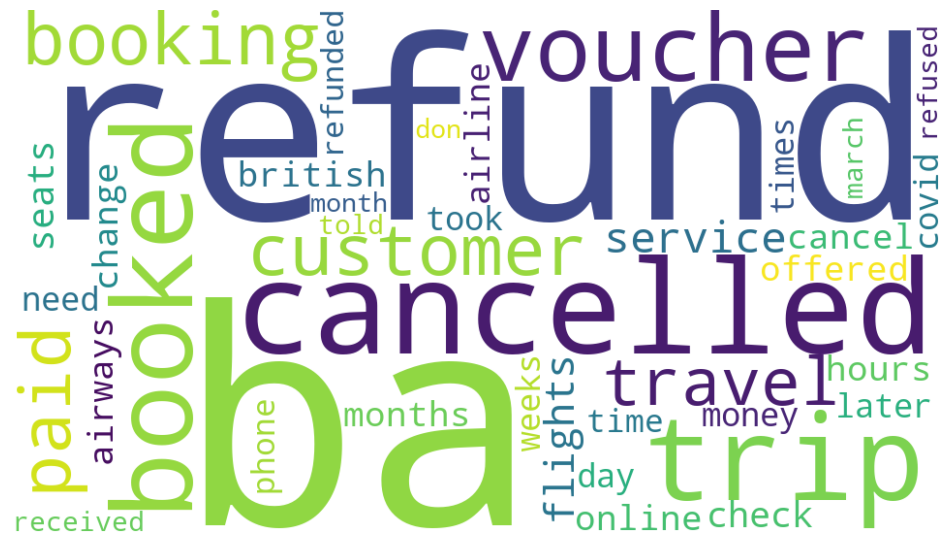

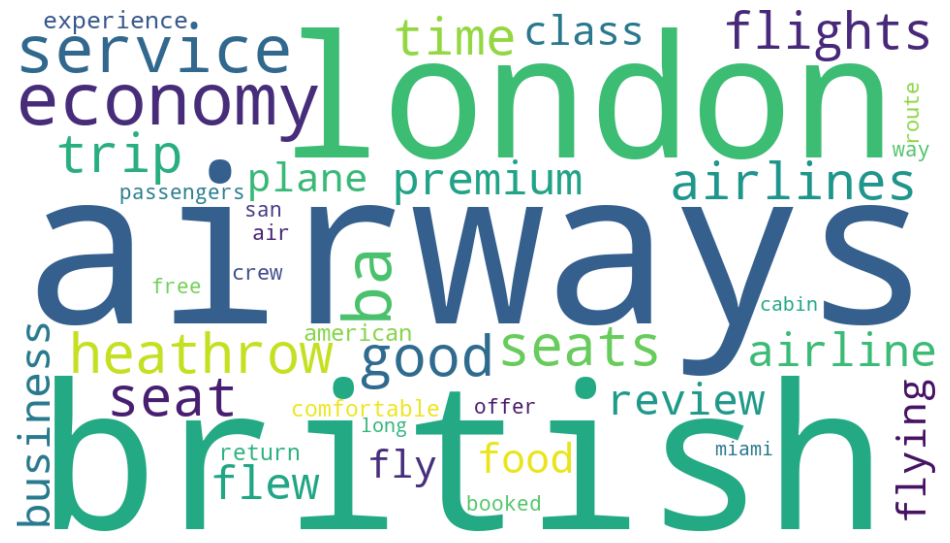

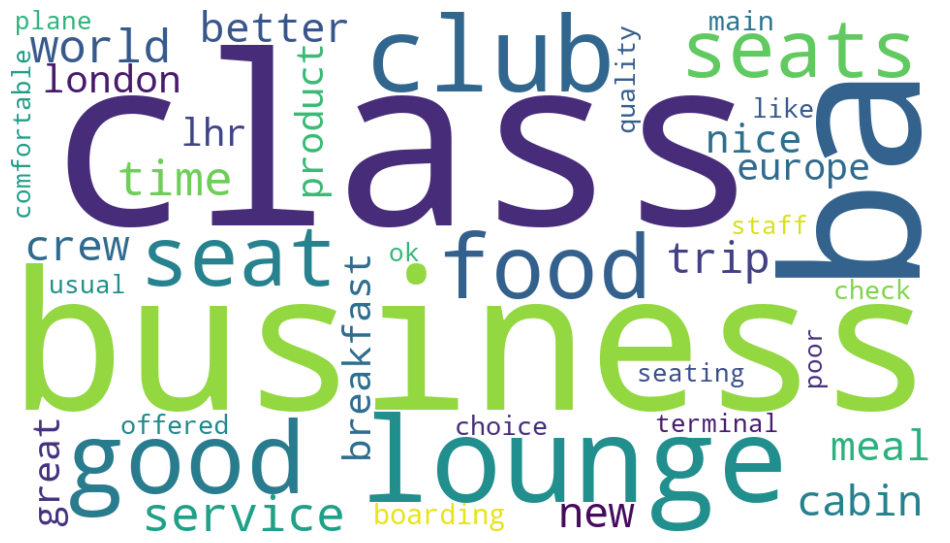

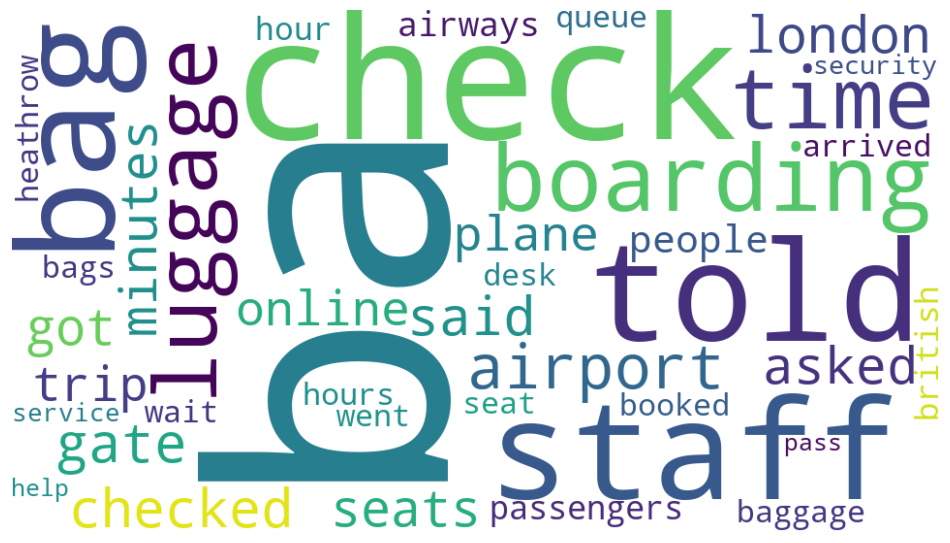

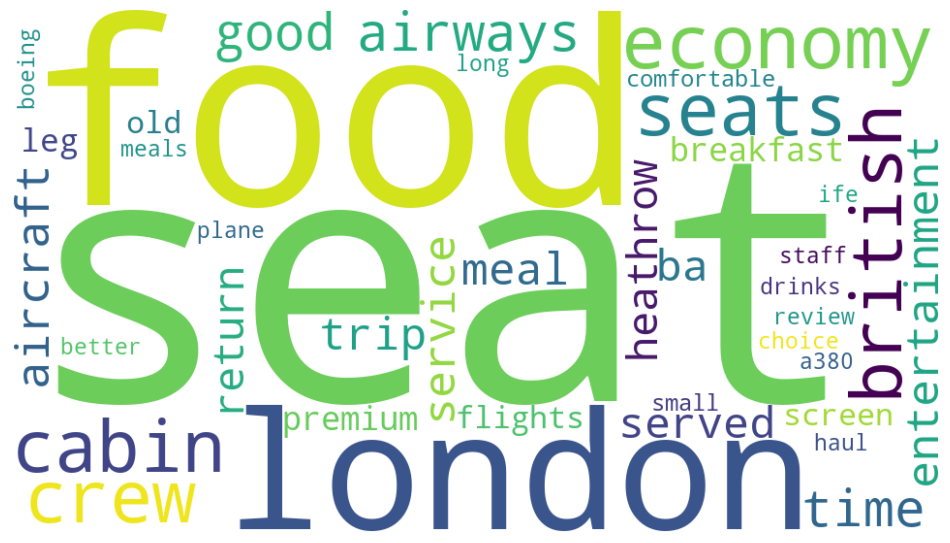

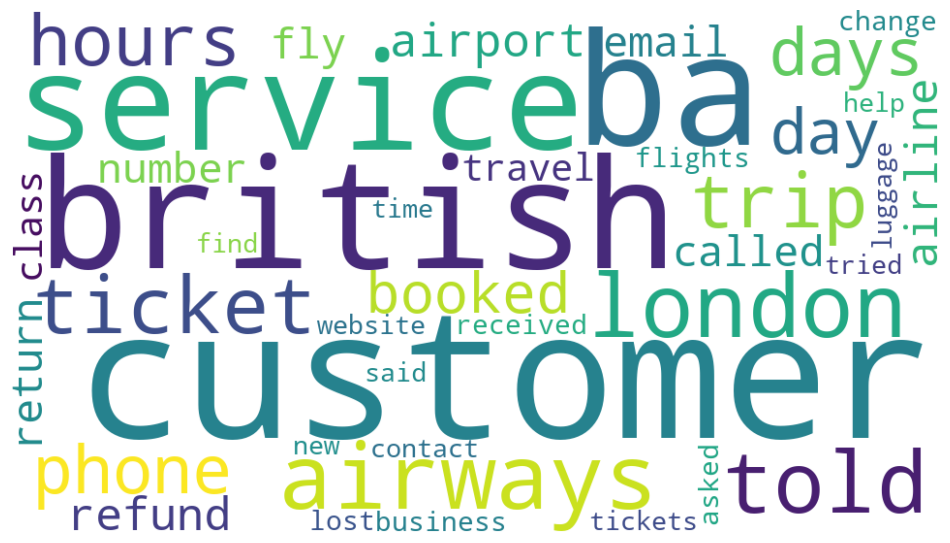

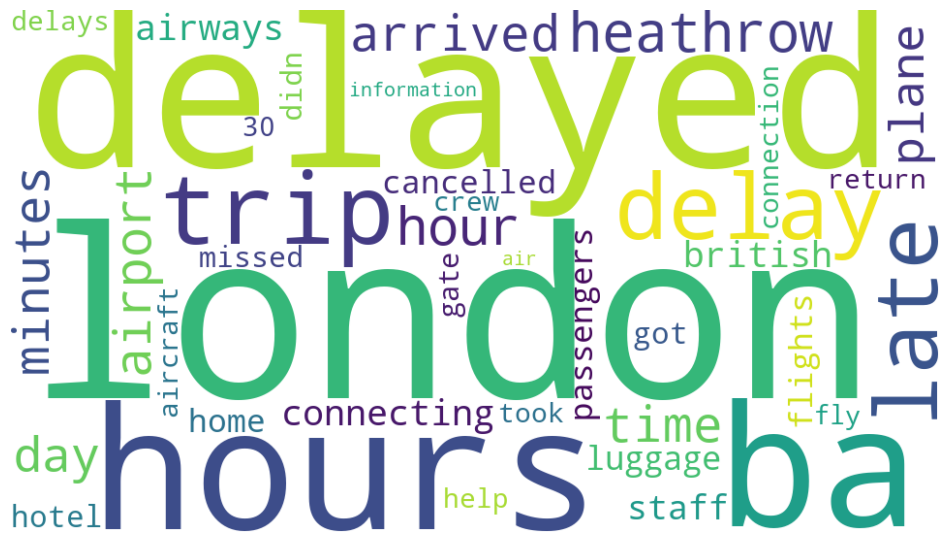

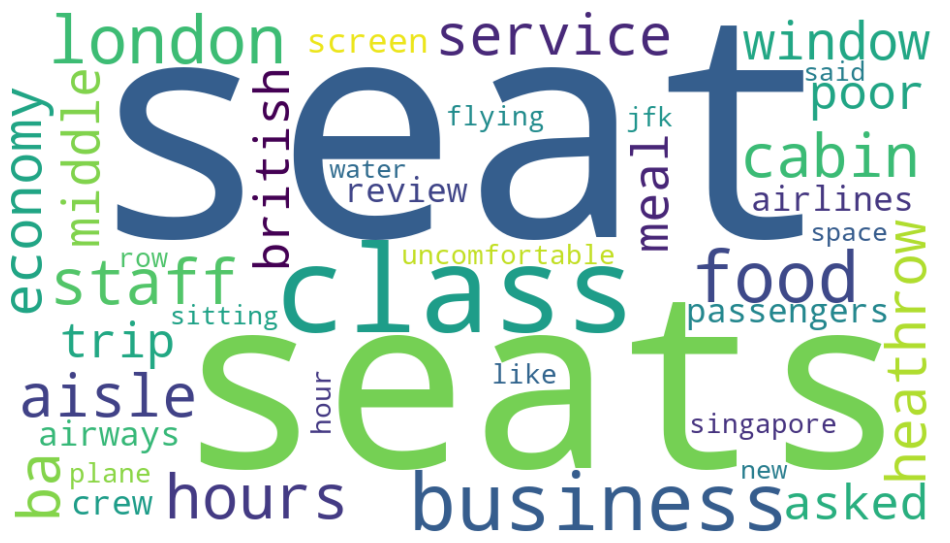

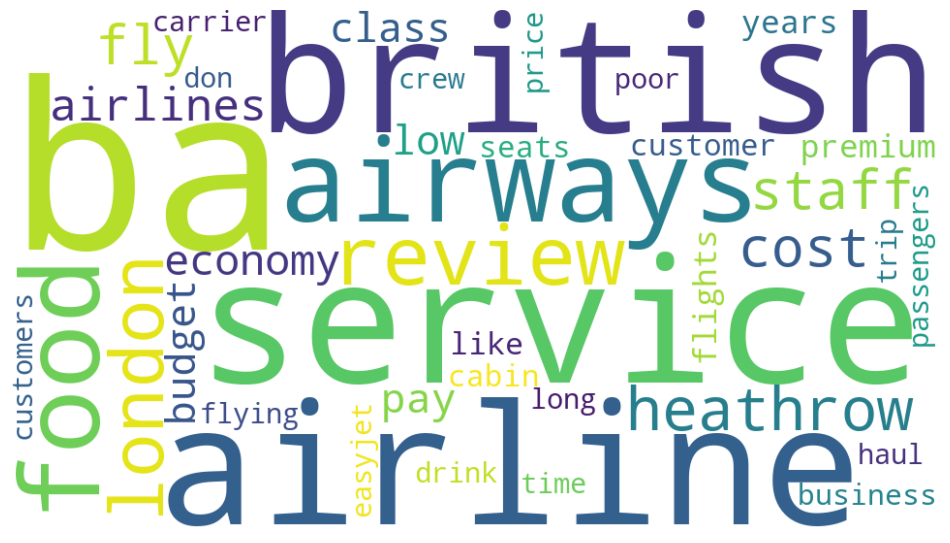

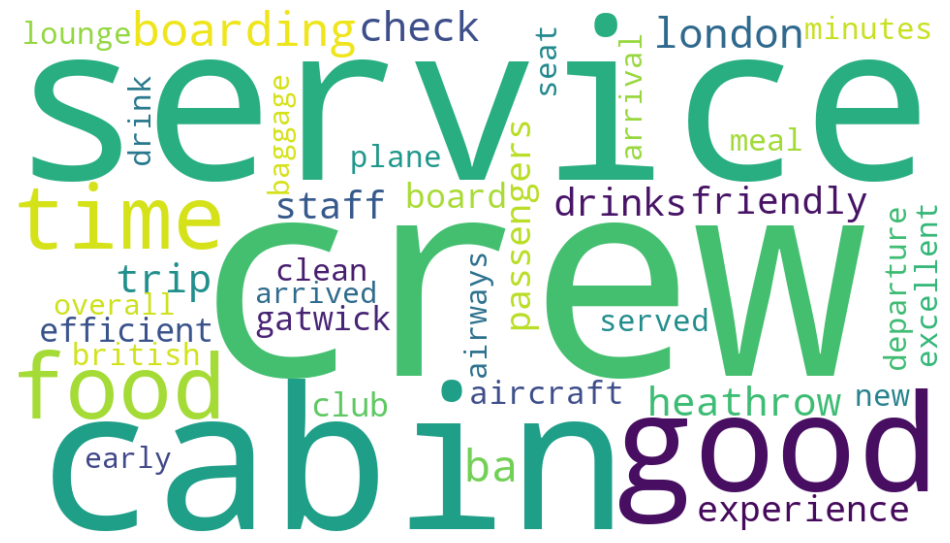

In [33]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## Topics names by joining the top 2 words:

In [34]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)


Vocabulary: ['00' '000' '05' ... 'zero' 'zone' 'zurich']
Topic Names: ['Topic good crew', 'Topic ba customer', 'Topic class business', 'Topic check boarding', 'Topic club world', 'Topic seat seats', 'Topic british airways', 'Topic crew meal', 'Topic economy premium', 'Topic luggage hours']


## Separate data by year

In [40]:
import pandas as pd
import re

# Function to remove ordinal indicators
def remove_ordinal_indicators(date_str):
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)

# Apply this function to the 'date' column
df['date'] = df['date'].apply(remove_ordinal_indicators)

# Now try converting to datetime
df['year'] = pd.to_datetime(df['date'], format='%d %B %Y').dt.year


## Draw time chart

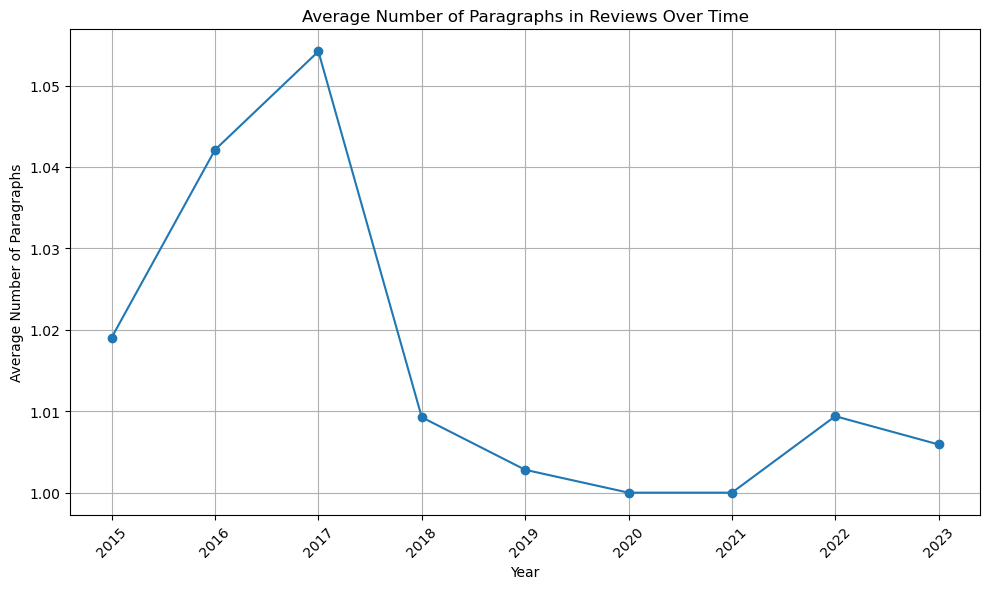

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'year' is already in your DataFrame and 'number_of_paragraphs' is the column you want to plot
# Group by 'year' and calculate the average number of paragraphs per review for each year
yearly_data = df.groupby('year')['number_of_paragraphs'].mean()

# Plotting
plt.figure(figsize=(10, 6))
yearly_data.plot(kind='line', marker='o', linestyle='-')  # Line plot with markers at each data point

plt.title('Average Number of Paragraphs in Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Paragraphs')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlap
plt.tight_layout()  # Adjust subplot parameters to make the layout fit your screen

plt.show()


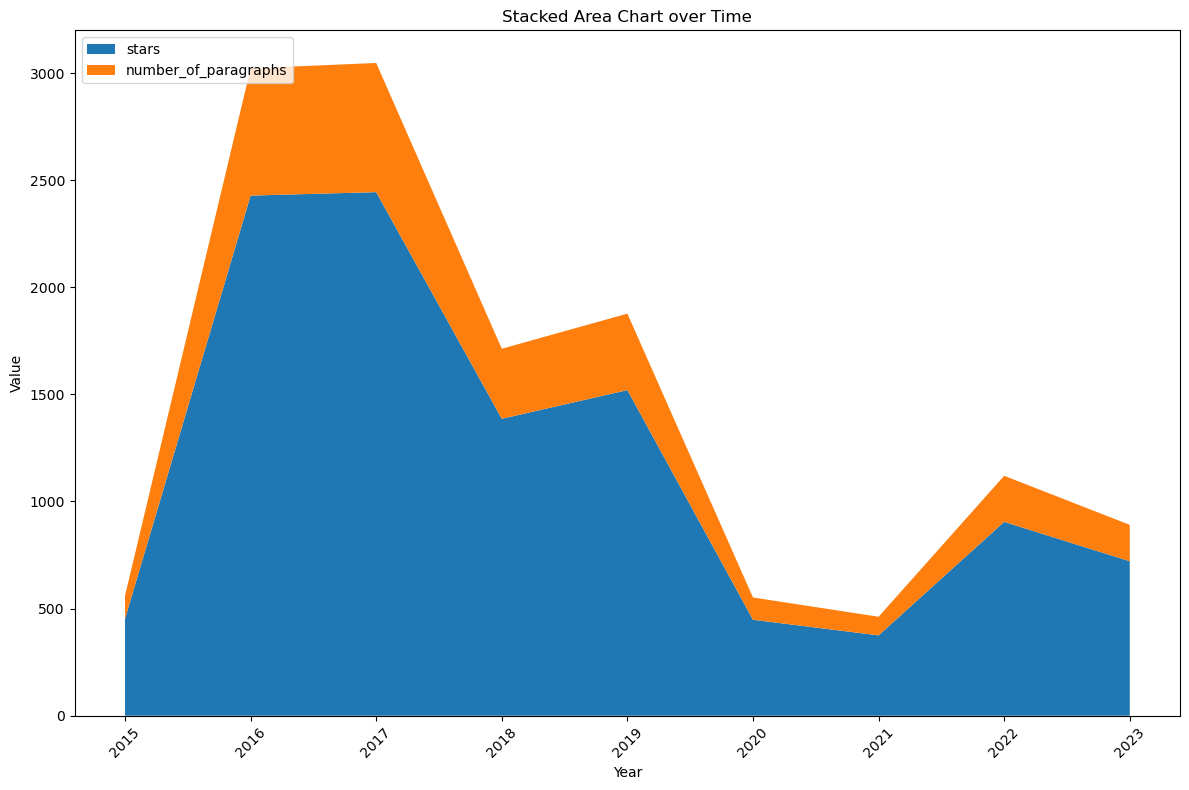

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure 'year' is treated as an integer or categorical, not as part of data to plot
df['year'] = df['year'].astype(int)

# Group data by 'year' and sum values for each year across each numeric column
grouped_data = df.groupby('year').sum()

# Extracting only the numeric columns for plotting, excluding 'year' if it's in the index now
numeric_columns = grouped_data.select_dtypes(include=[np.number])

# Prepare the data for plotting
years = grouped_data.index
categories = [numeric_columns[col] for col in numeric_columns.columns]

# Plotting the stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(years, categories, labels=numeric_columns.columns)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Value')  # Replace 'Value' with what the numbers represent
plt.title('Stacked Area Chart over Time')
plt.legend(loc='upper left')
plt.xticks(years, rotation=45)  # Rotate the x-axis labels to prevent overlap
plt.tight_layout()

plt.show()
